# Start Gui

This notebook can be used to start the GUI and test out stuff.

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Fabian Balzer

***
LICENSE:
    Copyright 2021 Fabian Balzer

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
***

Code to open a GUI Dominion randomizer
"""
# %%

import sys
import random_kingdominion as rk
import PyQt5.QtWidgets as QW


def start_program():
    """A function to include everything needed to start the application"""
    # Check whether there is already a running QApplication (e.g. if running
    # from an IDE). This setup prevents crashes for the next run:
    qapp = QW.QApplication.instance()
    if not qapp:
        qapp = QW.QApplication(sys.argv)
    app = rk.UIMainWindow()  # creating the instance
    app.show()
    app.activateWindow()
    qapp.exec_()  # Start the Qt event loop



2024-07-29 19:30:52.149 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-07-29 19:30:52.845 "deprecation.showPyplotGlobalUse" is not a valid config option. If you previously had this config option set, it may have been removed.
2024-07-29 19:30:52.845 
  command:

    streamlit run c:\Users\fabia\anaconda3\envs\3_11_Dominion\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-29 19:30:52.845 No runtime found, using MemoryCacheStorageManager
2024-07-29 19:30:52.853 No runtime found, using MemoryCacheStorageManager
2024-07-29 19:30:52.853 No runtime found, using MemoryCacheStorageManager


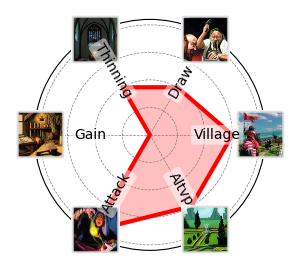

In [2]:

start_program()


In [1]:
import random_kingdominion as rk
import os
import pandas as pd
from pathlib import Path
import numpy as np
from typing import Sequence


def read_dataframe_from_file(fpath: str | Path, eval_lists=False) -> pd.DataFrame:
    """Read a dataframe"""
    if os.path.isfile(fpath):
        df = pd.read_csv(fpath, sep=";", header=0)
        if eval_lists:
            for colname in df.columns:
                if "type" in colname.lower():
                    # Make sure we properly handle lists
                    df[colname] = df[colname].apply(eval)
    else:
        raise FileNotFoundError(
            2, "Couldn't find the raw card data file, please download it first."
        )
    return df
from functools import reduce
df = read_dataframe_from_file(rk.FPATH_CARD_DATA, True)
names = rk.ALL_CSOS["Name"].sample(200).values

pd.set_option('display.max_rows', None)
mask = (df["altvp_quality"] > 0)
mask *= ~df["IsOtherThing"]
mask *= ~rk.listlike_contains_any(df["attack_types"], ["Scoring", "Trashing"])
mask *= (df["CardAmount"] != "1") | (df["CardAmount"] == 0)
df[mask][["Cost", "Name", "altvp_quality", "Types", "attack_types", "CardAmount"]].sort_values(["altvp_quality", "Cost"], ascending=[False, True])
# np.sum(mask)
# df["CardAmount"]
# df[["Final Expansion", "Name"]];
# df[df["Expansion"] == "Nocturne"]


,Cost,Name,altvp_quality,Types,attack_types,CardAmount
154,$11,Colony,3,[Victory],[],8*
786,$3*,Castles,3,"[Victory, Castle]",[],8*
133,$5,Collection,3,[Treasure],[],10
309,$5,Distant Lands,3,"[Action, Reserve, Victory]",[],8*
371,$5,Groundskeeper,3,[Action],[],10
145,$6,Goons,3,"[Action, Attack]",[Handsize],10
107,P,Vineyard,3,[Victory],[],8*
43,$3,Great Hall,2,"[Action, Victory]",[],8*
181,$3,Tunnel,2,"[Victory, Reaction]",[],8*
356,$3,Chariot Race,2,[Action],[],10


In [1]:
from PyQt5.QtCore import Qt, QStringListModel, QPoint
from PyQt5.QtGui import QIcon, QStandardItemModel, QPalette, QTextCursor, QTextCharFormat, QCursor
from PyQt5.QtWidgets import QApplication, QWidget, QHBoxLayout, QLineEdit, QPushButton, QVBoxLayout, QMainWindow, QCompleter, QTextEdit,QLabel, QFrame
from typing import Sequence
from random_kingdominion.constants import ALL_CSOS




class MyMainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # Create a central widget
        centralWidget = QWidget(self)
        self.setCentralWidget(centralWidget)

        # Create a layout for the central widget
        layout = QVBoxLayout()

        # Create the ValidatingLineEditWidget
        self.validatingLineEditWidget = CSVValidationWidget()
        layout.addWidget(self.validatingLineEditWidget)
        self.validatingLineEditWidget.set_allowed_csos(set(ALL_CSOS.Name))

        # Set the layout for the central widget
        centralWidget.setLayout(layout)

        # Set window properties
        self.setWindowTitle('Main Window with ValidatingLineEditWidget')
        self.setGeometry(100, 100, 400, 200)

qapp = QApplication.instance()
if not qapp:
    qapp = QApplication(sys.argv)
app = MyMainWindow()  # creating the instance
app.show()
app.activateWindow()
qapp.exec_()  # Start the Qt event loop


0

In [64]:
import matplotlib.pyplot as plt
df = rk.ALL_CSOS.copy()
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))
# df = df[df["IsInSupply"]]


In [7]:
count_dict = {}
lengths = {}
for expansion in df["Expansion"].unique():
    mask = df["Expansion"] == expansion
    mask *= ~df["IsOtherThing"]
    count_dict[expansion] = df[mask]["word_count"].mean()
    lengths[expansion] = len(df[mask])

count_dict = {k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1])}

fig, ax = plt.subplots()
# Use the amount of objects for color indication:
c_normalized = [lengths[k] for k in count_dict.keys()]
c_max = max(c_normalized)
c_min = min(c_normalized)
c_normalized = [(x - c_min) / (c_max - c_min) for x in c_normalized]
# Use the normalized values to get colors from the colormap
colors = [plt.cm.tab20(x) for x in c_normalized]

ax.barh(list(count_dict.keys()), list(count_dict.values()), color=colors)
ax.set_title("Average word count of cards, in supply only")
# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.tab20, norm=plt.Normalize(vmin=c_min, vmax=c_max))
plt.colorbar(sm, ax=ax, label='Number of Cards')
import numpy as np
len(df), len(np.unique(df.index))
exp = "Guilds, 1E"
exp = "Menagerie"
# exp = "Cornucopia, 1E"
# exp = "Seaside, 1E"
fig, ax = plt.subplots(figsize=(8, 14))
vals = df[df["Expansion"] == exp][["Name", "word_count"]].sort_values("word_count", ascending=True)
ax.barh(vals["Name"], vals["word_count"], ec="k", height=0.5)
ax.axvline(vals["word_count"].mean(), color="k", linestyle="--")
ax.grid(axis="x")
vals.head(10)


NameError: name 'df' is not defined

In [19]:
from __future__ import annotations
import random_kingdominion as rk
import numpy as np
import re
from collections import defaultdict
from random_kingdominion.kingdom import sanitize_cso_name


example_1 = "Archive, Druid (The Earth's Gift, The Field's Gift, The Sun's Gift), Inherited (Sanctuary), Investment, Lighthouse, Mining Village, No Colonies, No Shelters, Obelisk (Cargo Ship), Sanctuary, Sentry, Taxman, Villa, Cargo Ship"
example_2 = "Banish, Cage, Coin of the Realm, Figurine, Governor, Merchant Camp, No Colonies, No Shelters, Prosper, Quartermaster, Secluded Shrine, Sheepdog, Torturer, Young Witch (Improve)"
example_3 = "Beggar, Border Village, Colonies, Harbinger, Hireling, Knights, Masterpiece, Mountain Pass, No Shelters, Nobles, Stowaway, Tools, Way of the Owl, Wine Merchant"
example_4 = "Architects' Guild, Camel Train, Cartographer, Druid (The Field's Gift, The Flame's Gift, The Wind's Gift), Emissary, Encampment, Fortress, Gladiator, Hostelry, Mirror, No Colonies, Shelters, Tournament, Villain"
example_5 = "Black Cat, Conquest, Crucible, Enchantress, Gladiator, Gondola, Longship, Moneylender, No Colonies, No Shelters, Pooka, Treasure Map, Vassal, Way of the Mouse (Menagerie)"
example_6 = "black_cat, enchantress, gladiator, vassal, crucible, gondola, moneylender, treasure_map, longship, pooka, way_of_the_mouse:menagerie, conquest -m NoColonies, NoShelters"
# k = KingdomTest(["Chapel", "Village", "Smithy", "Druid", "Young Witch", "Hamlet", "Torturer"], "asdf", ["Way of the Mouse", "Obelisk", "Inherited"], mouse_card="Chapel", druid_boons=["Wind", "Flame", "Earth"], bane_pile="Hamlet", obelisk_pile="Young Witch", traits=[["Inherited", "Torturer"]])
# k.get_dombot_csv_string()
# [cso for cso in rk.ALL_CSOS.index if "gift" in cso]
manager = rk.KingdomManager(load_last=True)
# for kingdom in manager.kingdoms:
#     print(kingdom)
#     print(rk.Kingdom.from_dombot_csv_string(kingdom.get_dombot_csv_string()).get_dombot_csv_string())
#     assert kingdom == rk.Kingdom.from_dombot_csv_string(kingdom.get_dombot_csv_string()), kingdom.idx
# # k.get_dombot_csv_string(), k2.get_dombot_csv_string()


                          Name  draw_quality
index_name                                  
moneylender        Moneylender             0
port                      Port             0
ranger                  Ranger             2
remodel                Remodel             0
smithy                  Smithy             2
artificer            Artificer             0
distant_lands    Distant Lands             0
lost_city            Lost City             2
royal_carriage  Royal Carriage             0
witch                    Witch             1


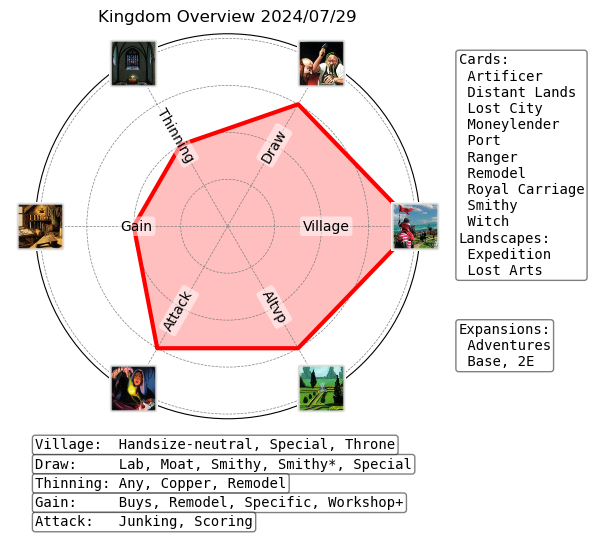

In [4]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import random_kingdominion as rk
from matplotlib.axes import Axes


k: rk.Kingdom
k = rk.Kingdom.from_dombot_csv_string("fools_gold, apothecary, guard_dog, philosophers_stone, trader, apprentice, margrave, souk, stables, wheelwright")
k = rk.Kingdom.from_dombot_csv_string("Catacombs, Changeling, Duke, Idol, Investment, King's Court, Monkey, No Colonies, No Shelters, Orchard, Palace, Patrol, Shaman, Specialist")
k = rk.Kingdom.from_dombot_csv_string("Advance, Charm, Council Room, Ghost Town, No Colonies, No Shelters, Pickaxe, Pious (Souk), Recruiter, Souk, Squire, Stonemason, Tragic Hero, Village")
k = rk.Kingdom.from_dombot_csv_string("Haven, Smugglers, Tactician, Treasury, Wharf, Landing Party, Shaman, Cutthroat, Maroon, Quartermaster, Rush, Nearby")
k.name = "2024/07/18"

k = rk.Kingdom.from_dombot_csv_string("vineyard, townsfolk, clashes, merchant_camp, cavalry, apprentice, hunting_lodge, swap, marquis, animal_fair, toil, way_of_the_turtle")
k = rk.Kingdom.from_dombot_csv_string("engineer, camel_train, sentinel, advisor, bishop, mill, sacrifice, baker, knights, royal_carriage, mission, way_of_the_sheep")
k.name = "2024/07/20"
k = rk.Kingdom.from_dombot_csv_string("black_cat, lurker, augurs, watchtower, necromancer, sailor, trader, baker, trading_post, fairgrounds, wall, windfall")
k.name = "2024/07/21"
k = rk.Kingdom.from_dombot_csv_string("chapel, courtyard, merchant, baron, gardens, militia, remodel, secret_passage, festival, upgrade")
k.name = "2024/07/22"
k = rk.Kingdom.from_dombot_csv_string("haven, monkey, blockade, sailor, bazaar, merchant_ship, outpost, sea_witch, treasury, wharf")
k.name = "2024/07/23"
k = rk.Kingdom.from_dombot_csv_string("crossroads, scheme, patron, weaver, highway, old_witch, scholar, sculptor, stables, villain")
k.name = "2024/07/24"
k = rk.Kingdom.from_dombot_csv_string("ducat, herbalist, scrying_pool, experiment, improve, inventor, silk_merchant, recruiter, sculptor, swashbuckler, academy, piazza")
k.name = "2024/07/25"
k = rk.Kingdom.from_dombot_csv_string("moneylender, port, ranger, remodel, smithy, artificer, distant_lands, lost_city, royal_carriage, witch, lost_arts, expedition")
k.name = "2024/07/29"
rk.plot_normalized_polygon(k.total_qualities)
ax: plt.Axes = plt.gca()
rk.add_kingdom_info_to_plot(ax, k)
print(k.kingdom_card_df[["Name", "draw_quality"]])
# rk.ALL_CSOS[rk.ALL_CSOS["village_quality"] > 0]["Name"]
# print("\n".join([f'"{card}": [""],' for card in sorted(rk.ALL_CSOS[rk.ALL_CSOS["village_quality"] > 0]["Name"].tolist())]))


In [ ]:

engine_ish = [k for k in manager.kingdoms if all([k.total_qualities[qual] > 1 for qual in ["draw", "village", "gain", "thinning"]])]

for k in engine_ish[:1]: # manager.kingdoms[:3]:
    rk.plot_normalized_polygon(k.total_qualities)
    ax: plt.Axes = plt.gca()
    add_kingdom_info(ax, k)


c:\Users\fabia\OneDrive\Dokumente\Freizeit\Dominion\Dominion_randomizer\random_kingdominion\utils\plotting.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))


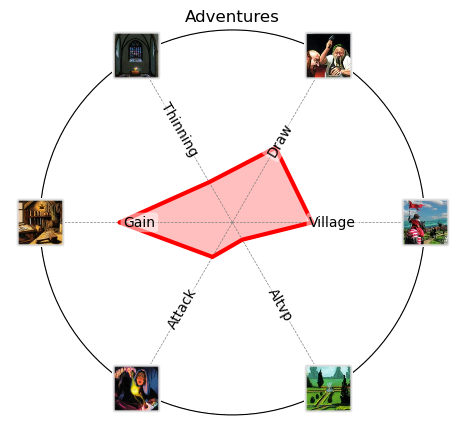

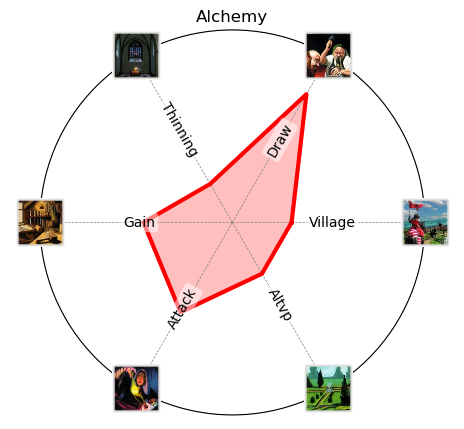

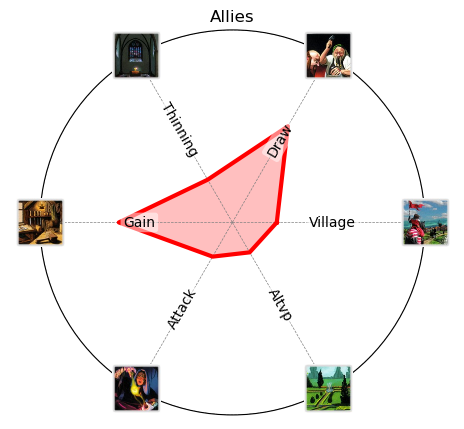

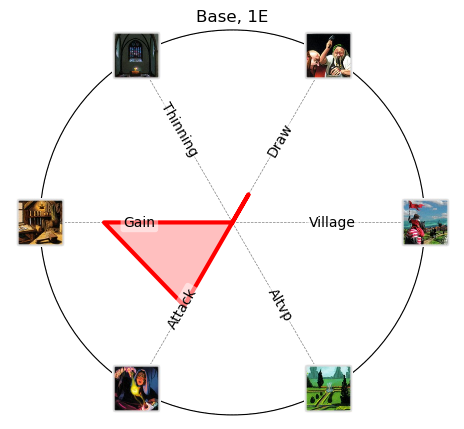

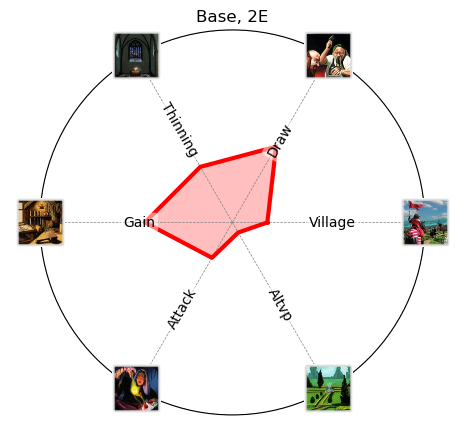

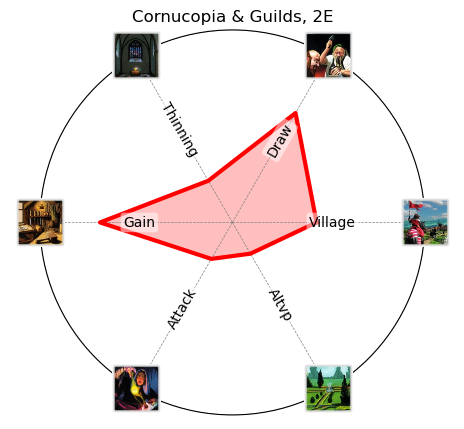

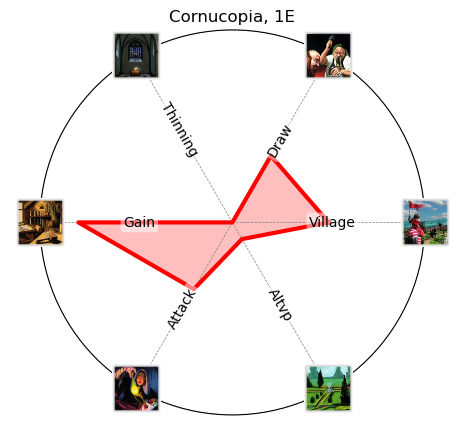

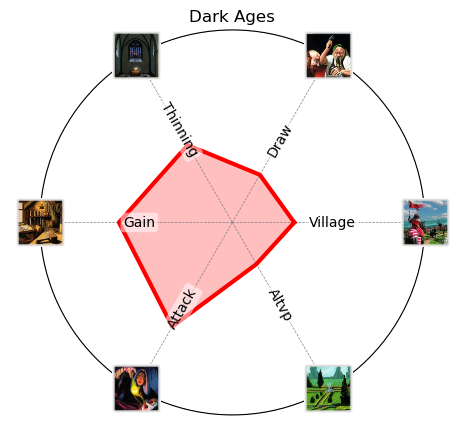

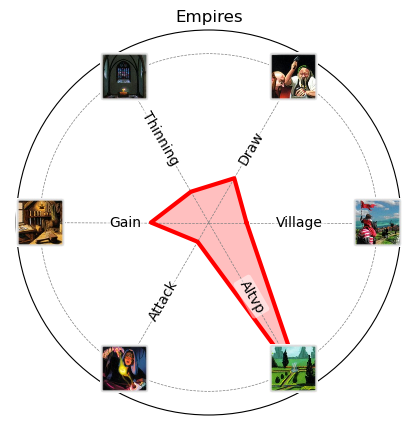

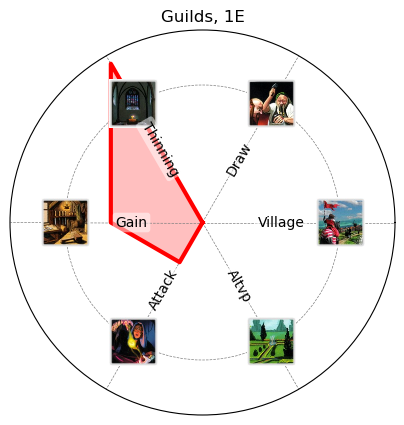

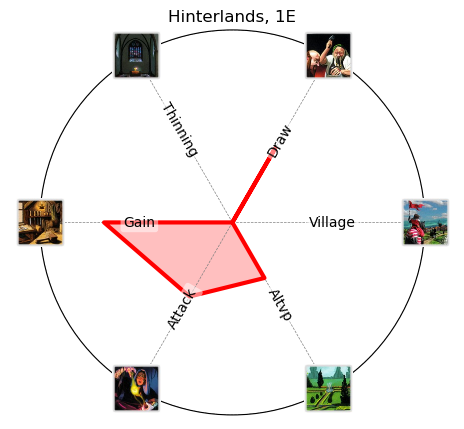

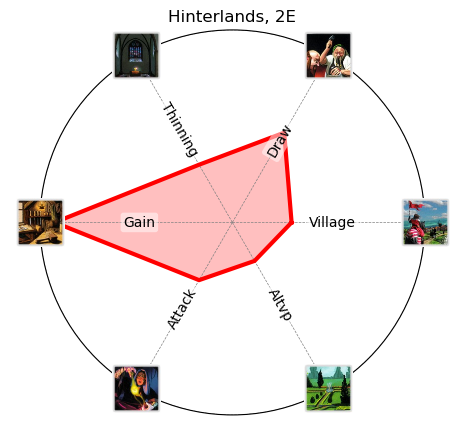

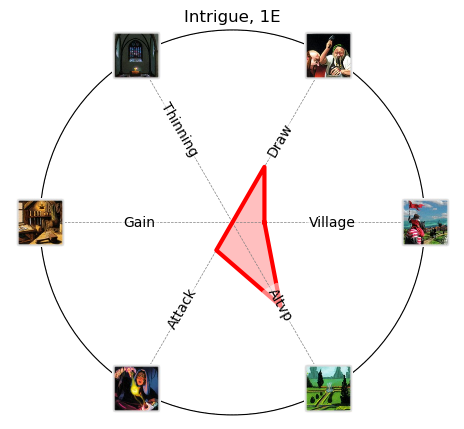

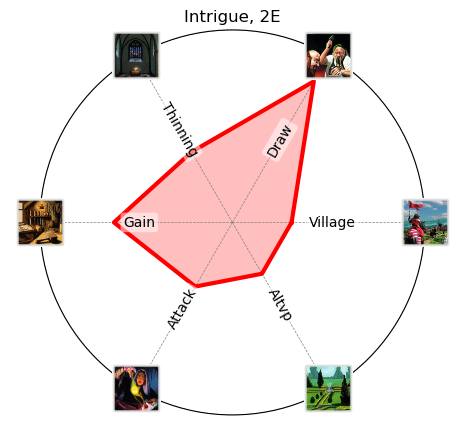

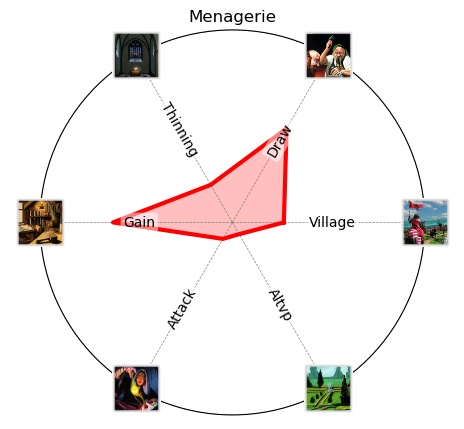

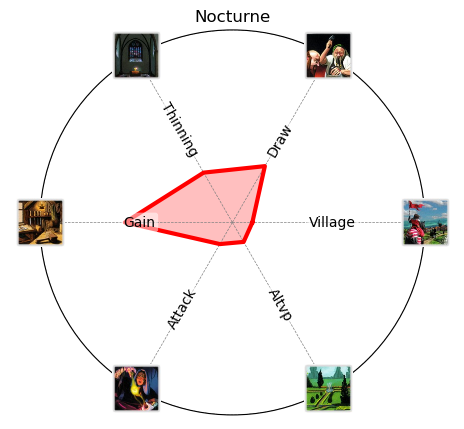

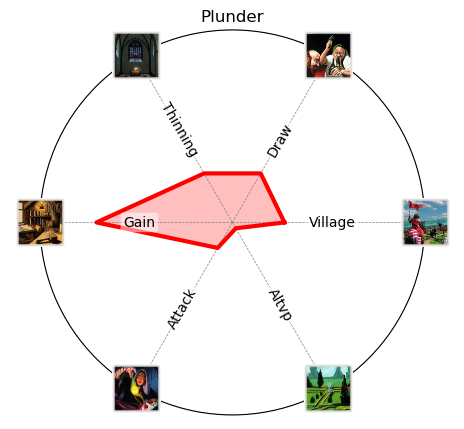

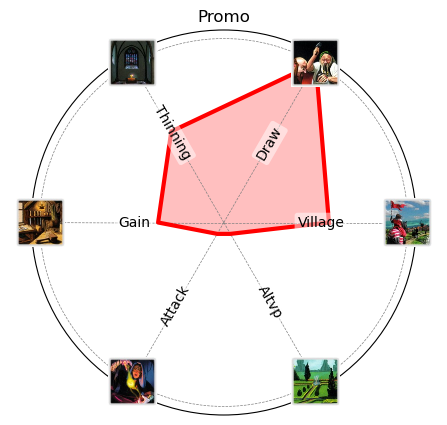

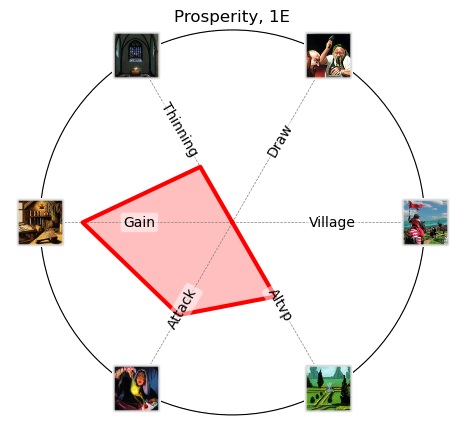

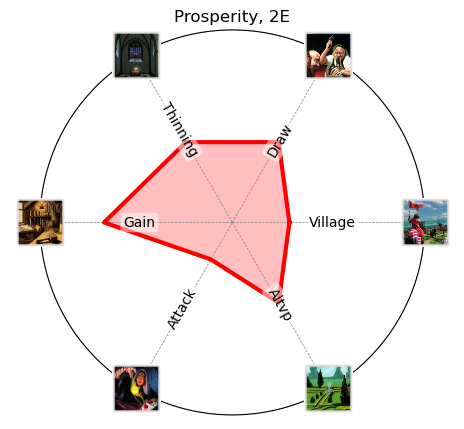

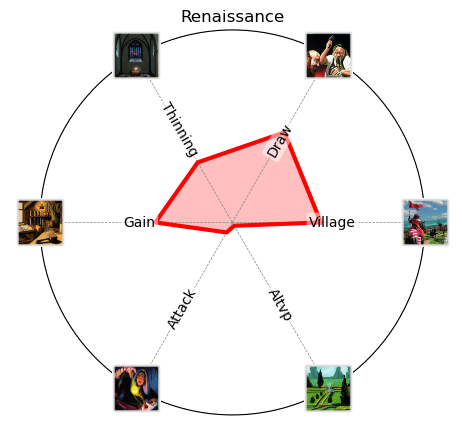

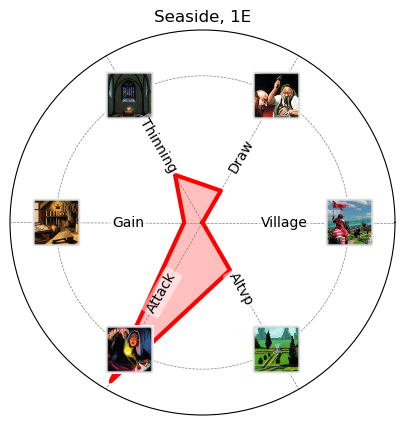

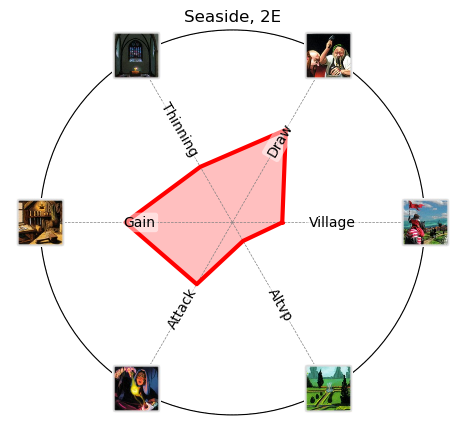

In [11]:
exp_quals = {}
for expansion in np.unique(rk.ALL_CSOS["Final Expansion"]):
    sub_df = rk.ALL_CSOS[rk.ALL_CSOS["Final Expansion"] == expansion]
    obj_num = len(sub_df)
    full_qual_dict = {qual: sum(sub_df[f"{qual}_quality"])/obj_num for qual in rk.QUALITIES_AVAILABLE}
    exp_quals[expansion] = full_qual_dict
import matplotlib.pyplot as plt

for exp, vals in exp_quals.items():
    rk.plot_normalized_polygon(data=vals, max_val=1)
    ax = plt.gca()
    ax.set_title(exp)


In [6]:
rk.plot_normalized_polygon({k: manager.kingdoms[10].total_qualities[k] for k in ["village", "draw", "thinning", "gain", "attack", "altvp"]});


NameError: name 'manager' is not defined

In [5]:
rk.ALL_CSOS[rk.ALL_CSOS["Expansion"] == "Plunder"]["Name"].tolist()


['Cage',
 'Grotto',
 'Jewelled Egg',
 'Search',
 'Shaman',
 'Secluded Shrine',
 'Siren',
 'Stowaway',
 'Taskmaster',
 'Abundance',
 'Cabin Boy',
 'Crucible',
 'Flagship',
 'Fortune Hunter',
 'Gondola',
 'Harbor Village',
 'Landing Party',
 'Mapmaker',
 'Maroon',
 'Rope',
 'Swamp Shacks',
 'Tools',
 'Buried Treasure',
 'Crew',
 'Cutthroat',
 'Enlarge',
 'Figurine',
 'First Mate',
 'Frigate',
 'Longship',
 'Mining Road',
 'Pendant',
 'Pickaxe',
 'Pilgrim',
 'Quartermaster',
 'Silver Mine',
 'Trickster',
 'Wealthy Village',
 'Sack of Loot',
 "King's Cache",
 'Amphora',
 'Doubloons',
 'Endless Chalice',
 'Figurehead',
 'Hammer',
 'Insignia',
 'Jewels',
 'Orb',
 'Prize Goat',
 'Puzzle Box',
 'Sextant',
 'Shield',
 'Spell Scroll',
 'Staff',
 'Sword',
 'Bury',
 'Avoid',
 'Deliver',
 'Peril',
 'Rush',
 'Foray',
 'Launch',
 'Mirror',
 'Prepare',
 'Scrounge',
 'Journey',
 'Maelstrom',
 'Looting',
 'Invasion',
 'Prosper',
 'Cheap',
 'Cursed',
 'Fated',
 'Fawning',
 'Friendly',
 'Hasty',
 'Inherit

In [8]:
recsets = rk.KingdomManager()
recsets.load_recommended_kingdoms()
dailies = rk.KingdomManager()
dailies.load_kingdoms_from_yaml(rk.PATH_ASSETS.joinpath("kingdoms/dailies_prelim.yml"))


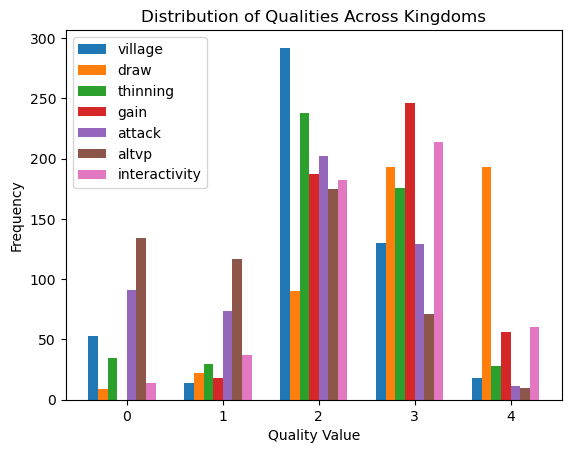

[Kingdom(cards=['bandit', 'bureaucrat', 'chapel', 'harbinger', 'laboratory', 'merchant', 'mine', 'moneylender', 'throne_room', 'vassal'], landscapes=[], expansions=['Base, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', mouse_card='', druid_boons=[], traits=[], name='Silver & Gold', notes='', idx=5, total_qualities={'village': 2, 'draw': 2, 'thinning': 3, 'gain': 1, 'attack': 1, 'altvp': 0, 'interactivity': 2}),
 Kingdom(cards=['advisor', 'baker', 'courtyard', 'doctor', 'farm', 'masterpiece', 'nobles', 'plaza', 'replace', 'wishing_well'], landscapes=[], expansions=['Guilds', 'Intrigue, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', mouse_card='', druid_boons=[], traits=[], name='Name That Card', notes='', idx=57, total_qualities={'village': 2, 'draw': 4, 'thinning': 3, 'gain': 1, 'attack': 1, 'altvp': 2, 'interactivity': 2}),
 Kingdom(cards=['cutpurse', 'guildmaster', 'highwayman', 'native_village', 'odyss

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rk.QUALITIES_AVAILABLE is a list of qualities you want to plot
qualities = rk.QUALITIES_AVAILABLE.copy()


x = np.arange(6)  # Qualities can be in the range [0, 5]

# The frequencies of how often each quality appears in the data
y_data = {}
for qual in qualities:
    occurrences = [k.total_qualities[qual] for k in dailies.kingdoms]
    y_data[qual] =np.histogram(occurrences, bins=x)[0]



bar_width = 0.1  # Adjust as needed to fit your data

# Plotting
fig, ax = plt.subplots()
for i, qual in enumerate(qualities):
    # Adjust x positions for each quality
    adjusted_x_positions = x[:-1] + (i * bar_width)-len(qualities)*bar_width/2
    ax.bar(adjusted_x_positions, y_data[qual], width=bar_width, label=qualities[i])


# Add legend to distinguish different qualities
plt.legend()

# Add titles and labels as necessary
plt.title('Distribution of Qualities Across Kingdoms')
plt.xlabel('Quality Value')
plt.ylabel('Frequency')

plt.show()

[kingdom for kingdom in recsets.kingdoms if kingdom.total_qualities["gain"] == 1]


In [15]:
kingdoms = """Augurs, Barbarian, Catapult, Clashes, Colonnade, Enchantress, Highwayman, Keep, Legionary, Marquis, No Colonies, No Shelters, Skirmisher, Wizards
Augurs, Barbarian, Clashes, Highwayman, Innkeeper, Modify, No Colonies, No Shelters, Royal Galley, Skirmisher, Specialist, Summon, Wizards
Berserker, Black Cat, Camel Train, Cardinal, Cauldron, Coven, Gatekeeper, Margrave, No Colonies, No Shelters, Populate, Trail, Way of the Otter, Witch's Hut
Bandit, Blockade, Bureaucrat, Corsair, Cutpurse, Market, Militia, Monkey, No Colonies, No Shelters, Sea Witch, Witch
Bonfire, Bridge Troll, Charlatan, Clerk, Giant, Haunted Woods, Magpie, No Colonies, No Shelters, Rabble, Raid, Ranger, Relic, Swamp Hag
Berserker, Cauldron, Idol, Margrave, No Colonies, No Shelters, Raider, Skulk, Tormentor, Vampire, Werewolf, Witch's Hut
Familiar, Idol, No Colonies, No Shelters, Possession, Raider, Sacred Grove, Scrying Pool, Skulk, Tormentor, Vampire, Werewolf
Bridge, Contraband, Develop, Duchess, Duplicate, Governor, Keep, Loan, No Colonies, No Shelters, Prosper, Secret Cave, Specialist, Supplies, Way of the Mule, Wolf Den
Berserker, Catapult, Charm, Expand, Galleria, Hamlet, Looting, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Toil, Tower, University, Way of the Sheep
Berserker, Catapult, Charm, Expand, Galleria, Hamlet, Looting, No Colonies, No Shelters, Pickaxe, Rush, Search, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Catapult, Charm, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Rush, Search, Swamp Shacks, Tower, Travelling Fair, University, Way of the Sheep
Berserker, Catapult, Charm, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Summon, Swamp Shacks, Tower, Travelling Fair, University, Way of the Sheep
Berserker, Catapult, Charm, Expand, Galleria, Gamble, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Summon, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Expand, Galleria, Gamble, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Aqueduct, Berserker, Bonfire, Catapult, Charm, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Expand, Galleria, Hamlet, Journey, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Delay, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Citadel, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tomb, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Delve, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Berserker, Bonfire, Catapult, Charm, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pathfinding, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Barracks, Berserker, Bonfire, Catapult, Charm, Expand, Galleria, Hamlet, No Colonies, No Shelters, Pickaxe, Search, Swamp Shacks, Tower, University, Way of the Sheep
Avoid, Buried Treasure, Cursed (Pickaxe), Enlarge, Maelstrom, No Colonies, No Shelters, Peril, Pickaxe, Quartermaster, Rope, Sack of Loot, Search, Silver Mine, Tools, Wealthy Village
Buried Treasure, Bury, Enlarge, First Mate, Grotto, Jewelled Egg, No Colonies, No Shelters, Pious (Wealthy Village), Prosper, Quartermaster, Rich (Quartermaster), Rope, Sack of Loot, Tools, Wealthy Village
Buried Treasure, Bury, Enlarge, First Mate, Grotto, Inspiring (First Mate), Jewelled Egg, No Colonies, No Shelters, Pious (Wealthy Village), Prosper, Quartermaster, Rope, Sack of Loot, Tools, Wealthy Village
Abundance, Buried Treasure, Cheap (Wealthy Village), Crew, Enlarge, Frigate, Invasion, Jewelled Egg, Maelstrom, Mirror, No Colonies, No Shelters, Rope, Sack of Loot, Tools, Wealthy Village
Abundance, Buried Treasure, Crew, Enlarge, Frigate, Invasion, Jewelled Egg, Maelstrom, Mirror, No Colonies, No Shelters, Peril, Rope, Sack of Loot, Tools, Wealthy Village
Abundance, Buried Treasure, Crew, Enlarge, Frigate, Jewelled Egg, Maelstrom, Mirror, No Colonies, No Shelters, Peril, Rope, Sack of Loot, Scrounge, Tools, Wealthy Village
Abundance, Buried Treasure, Crew, Enlarge, Fawning (Tools), Frigate, Jewelled Egg, Mirror, No Colonies, No Shelters, Peril, Rope, Sack of Loot, Scrounge, Tools, Wealthy Village
Inspiring (Wealthy Village), Jewelled Egg, Maelstrom, Maroon, Mining Road, Nearby (Maroon), No Colonies, No Shelters, Pickaxe, Prosper, Quartermaster, Sack of Loot, Search, Silver Mine, Tools, Wealthy Village
Inspiring (Wealthy Village), Jewelled Egg, Maroon, Mining Road, Nearby (Maroon), No Colonies, No Shelters, Patient (Silver Mine), Pickaxe, Prosper, Quartermaster, Sack of Loot, Search, Silver Mine, Tools, Wealthy Village
Inspiring (Wealthy Village), Jewelled Egg, Maroon, Mining Road, Nearby (Maroon), No Colonies, No Shelters, Patient (Silver Mine), Pickaxe, Quartermaster, Sack of Loot, Search, Silver Mine, Tireless (Sack of Loot), Tools, Wealthy Village
Inspiring (Wealthy Village), Jewelled Egg, Maroon, Mining Road, Nearby (Maroon), No Colonies, No Shelters, Patient (Silver Mine), Pickaxe, Prepare, Quartermaster, Sack of Loot, Search, Silver Mine, Tools, Wealthy Village
Abundance, Foray, Jewelled Egg, Journey, Longship, No Colonies, No Shelters, Quartermaster, Reckless (Silver Mine), Rope, Rush, Sack of Loot, Shaman, Silver Mine, Tools, Wealthy Village
Abundance, Buried Treasure, Cheap (Silver Mine), Enlarge, Fated (Buried Treasure), Foray, Jewelled Egg, No Colonies, No Shelters, Pickaxe, Sack of Loot, Shaman, Silver Mine, Tireless (Enlarge), Tools, Wealthy Village
Abundance, Buried Treasure, Cursed (Mining Road), Figurine, Jewelled Egg, Mining Road, No Colonies, No Shelters, Pickaxe, Prosper, Reckless (Jewelled Egg), Rope, Sack of Loot, Shaman, Shy (Silver Mine), Silver Mine
Abundance, Cheap (Search), Fated (Rope), Longship, Mining Road, No Colonies, No Shelters, Pious (Wealthy Village), Quartermaster, Rope, Sack of Loot, Search, Shaman, Shy (Quartermaster), Tools, Wealthy Village
Buried Treasure, Cursed (Pickaxe), Grotto, Jewelled Egg, Looting, Mining Road, No Colonies, No Shelters, Patient (Wealthy Village), Pickaxe, Quartermaster, Reckless (Shaman), Rope, Sack of Loot, Shaman, Wealthy Village
Battlefield, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Museum, No Colonies, No Shelters, Peril, Silver Mine, Trickster, Triumphal Arch, Villa, Wealthy Village
Battlefield, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Museum, No Colonies, No Shelters, Shy (Charm), Silver Mine, Trickster, Triumphal Arch, Villa, Wealthy Village
Battlefield, Buried Treasure, Catapult, Charm, City Quarter, Cursed (Enlarge), Enlarge, Forum, No Colonies, No Shelters, Shy (Charm), Silver Mine, Trickster, Triumphal Arch, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Cursed (Enlarge), Enlarge, Forum, No Colonies, No Shelters, Shy (Charm), Silver Mine, Tomb, Trickster, Triumphal Arch, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, Cheap (City Quarter), City Quarter, Cursed (Enlarge), Enlarge, Forum, No Colonies, No Shelters, Shy (Charm), Silver Mine, Tomb, Trickster, Villa, Wealthy Village
Arena, Buried Treasure, Catapult, Charm, Cheap (City Quarter), City Quarter, Cursed (Enlarge), Enlarge, Forum, No Colonies, No Shelters, Silver Mine, Tomb, Trickster, Villa, Wealthy Village
Arena, Buried Treasure, Catapult, Charm, Cheap (City Quarter), City Quarter, Enlarge, Forum, No Colonies, No Shelters, Pious (Villa), Silver Mine, Tomb, Trickster, Villa, Wealthy Village
Arena, Avoid, Buried Treasure, Catapult, Charm, Cheap (City Quarter), City Quarter, Enlarge, Forum, No Colonies, No Shelters, Pious (Villa), Silver Mine, Trickster, Villa, Wealthy Village
Arena, Avoid, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Nearby (Silver Mine), No Colonies, No Shelters, Pious (Villa), Silver Mine, Trickster, Villa, Wealthy Village
Arena, Avoid, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Nearby (Silver Mine), No Colonies, No Shelters, Salt the Earth, Silver Mine, Trickster, Villa, Wealthy Village
Arena, Banquet, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Nearby (Silver Mine), No Colonies, No Shelters, Salt the Earth, Silver Mine, Trickster, Villa, Wealthy Village
Arena, Banquet, Buried Treasure, Catapult, Charm, City Quarter, Delve, Enlarge, Forum, No Colonies, No Shelters, Salt the Earth, Silver Mine, Trickster, Villa, Wealthy Village
Arena, Banquet, Buried Treasure, Catapult, Charm, City Quarter, Delve, Enlarge, Forum, No Colonies, No Shelters, Rich (Villa), Silver Mine, Trickster, Villa, Wealthy Village
Arena, Buried Treasure, Catapult, Charm, City Quarter, Delve, Enlarge, Forum, No Colonies, No Shelters, Rich (Villa), Silver Mine, Tireless (Charm), Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Delve, Enlarge, Forum, No Colonies, No Shelters, Rich (Villa), Scrounge, Silver Mine, Tireless (Charm), Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Labyrinth, No Colonies, No Shelters, Rich (Villa), Scrounge, Silver Mine, Tireless (Charm), Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Friendly (Catapult/Rocks), Labyrinth, No Colonies, No Shelters, Rich (Villa), Silver Mine, Tireless (Charm), Trickster, Villa, Wealthy Village
Baths, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Friendly (Catapult/Rocks), Labyrinth, No Colonies, No Shelters, Silver Mine, Tireless (Charm), Trickster, Villa, Wealthy Village
Baths, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Foray, Forum, Friendly (Catapult/Rocks), Labyrinth, No Colonies, No Shelters, Silver Mine, Trickster, Villa, Wealthy Village
Baths, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Foray, Forum, Friendly (Catapult/Rocks), Invasion, No Colonies, No Shelters, Silver Mine, Trickster, Villa, Wealthy Village
Baths, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Foray, Forum, Invasion, No Colonies, No Shelters, Silver Mine, Trickster, Villa, Wealthy Village, Wedding
Buried Treasure, Catapult, Charm, City Quarter, Dominate, Enlarge, Foray, Forum, Invasion, No Colonies, No Shelters, Silver Mine, Trickster, Villa, Wealthy Village, Wedding
Basilica, Buried Treasure, Catapult, Charm, City Quarter, Dominate, Enlarge, Forum, Invasion, No Colonies, No Shelters, Silver Mine, Trickster, Villa, Wealthy Village, Wedding
Basilica, Buried Treasure, Catapult, Charm, City Quarter, Dominate, Enlarge, Forum, No Colonies, No Shelters, Rush, Silver Mine, Trickster, Villa, Wealthy Village, Wedding
Aqueduct, Basilica, Buried Treasure, Catapult, Charm, City Quarter, Dominate, Enlarge, Forum, No Colonies, No Shelters, Rush, Silver Mine, Trickster, Villa, Wealthy Village
Aqueduct, Basilica, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Mountain Pass, No Colonies, No Shelters, Rush, Silver Mine, Trickster, Villa, Wealthy Village
Aqueduct, Basilica, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Keep, Mountain Pass, No Colonies, No Shelters, Silver Mine, Trickster, Villa, Wealthy Village
Aqueduct, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Keep, Mountain Pass, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Keep, Mountain Pass, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Keep, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Journey, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Hasty (Villa), Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Prepare, Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Fountain, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Orchard, Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Triumph, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Ritual, Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Deliver, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Mirror, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Palace, Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Fated (Wealthy Village), Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Tax, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Conquest, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village, Wolf Den
Buried Treasure, Bury, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Annex, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Launch, No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wall, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Maelstrom, No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Looting, No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Fawning (Wealthy Village), Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Tower, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), Inspiring (Villa), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Defiled Shrine, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Bandit Fort, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village, Windfall
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Reckless (Catapult/Rocks), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Prosper, Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Donate, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Advance, Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Colonnade, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, Inherited (Charm), No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, No Colonies, No Shelters, Obelisk (Trickster), Patient (Buried Treasure), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Trickster, Villa, Wealthy Village
Buried Treasure, Catapult, Charm, City Quarter, Enlarge, Forum, No Colonies, No Shelters, Obelisk (Trickster), Silver Mine, Villa, Wealthy Village, Wild Hunt"""
kingdoms.split("\n")
kingdoms = [rk.Kingdom.from_dombot_csv_string(csv) for csv in kingdoms.split("\n")]


In [16]:
rk.Kingdom.from_dombot_csv_string("flag bearer, urchin, rats, mountain village, scepter, sculptor, feodum, hermit, ducat, death cart, road network, fair")


Kingdom(cards=['death_cart', 'ducat', 'feodum', 'flag_bearer', 'hermit', 'mountain_village', 'rats', 'scepter', 'sculptor', 'urchin'], landscapes=['fair', 'road_network'], expansions=['Dark Ages', 'Renaissance'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', mouse_card='', druid_boons=[], traits=[], name='', notes='', idx=306893169233807975644182239606701389583, total_qualities={'altvp': 2, 'attack': 2, 'draw': 1, 'gain': 3, 'interactivity': 4, 'thinning': 3, 'village': 2})